In [1]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import seaborn as sns
#importing the custome data handler
from data_handler.data_handler import DataHandler
from grid_search import *
from bayes_search import *

In [2]:
class NaiveBayesClassifier:
    def __init__(self,var_smooth=1e-9):
        self.data_handler = DataHandler()
        self.var_smooth=var_smooth
        self.model=GaussianNB(var_smoothing=self.var_smooth)
    #loads the training data from the data handler as features and targets from the cleaned training data
    def load_train_data(self):
        print("Splitting training data into features and target variables")
        self.train_features,self.train_targets = self.data_handler.split_data(self.data_handler.train_data)
    
    #loads the validation data from the data handler as features and targets from the cleaned validation data
    def load_validation_data(self):
        print("Splitting validation data into features and target variables")
        self.validation_features,self.validation_targets = self.data_handler.split_data(self.data_handler.validation_data)
    
    #loads the test data from the data handler as features and targets from the cleaned test data
    def load_test_data(self):
        print("Splitting testing data into features and target variables")
        self.test_features,self.test_targets = self.data_handler.split_data(self.data_handler.test_data)
    
    #trains the model on the training data
    def train(self):
        print("Training the model with training data set")
        self.model.fit(self.train_features,self.train_targets)
    
    #predict the target for given features and returns the predicted targets use to predict the test data
    def predict(self,features):
        print("Predicting target varaibles using the features provided")
        return self.model.predict(features)
    
    #evaluates the model on the validation data
    def evaluate(self,DataFlag="Validation"):
        print("Evaluating the model's performance for {} dataset".format(DataFlag))
        if DataFlag=="Validation":
            features = self.validation_features
            targets = self.validation_targets
        elif DataFlag=="Test":
            features = self.test_features
            targets = self.test_targets
        predictions = self.predict(features)
        print("Accuracy: ",accuracy_score(targets,predictions))
        print("Classification Report: ",classification_report(targets,predictions))
        print("Confusion Matrix: ",confusion_matrix(targets,predictions))
        print("Roc Score : ",roc_auc_score(targets,predictions))
        self.plot_confusion_matrix(targets,predictions,DataFlag)
    

    #plot confusion matrix
    def plot_confusion_matrix(self,targets,predictions,dataFlag):
        cm = confusion_matrix(targets, predictions) 
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for {} data".format(dataFlag))
        plt.show()
    

In [3]:
nb=NaiveBayesClassifier()
nb.load_train_data()
nb.load_test_data()
nb.load_validation_data()

Splitting training data into features and target variables
Splitting testing data into features and target variables
Splitting validation data into features and target variables


In [4]:
nb.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.8089887640449438
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.83      0.85        58
           1       0.71      0.77      0.74        31

    accuracy                           0.81        89
   macro avg       0.79      0.80      0.79        89
weighted avg       0.81      0.81      0.81        89

Confusion Matrix:  [[48 10]
 [ 7 24]]
Roc Score :  0.8008898776418243


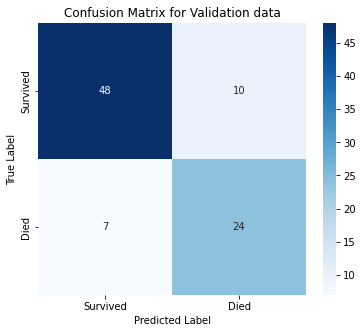

In [5]:
nb.evaluate(DataFlag="Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.7359550561797753
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.75      0.78       109
           1       0.64      0.71      0.68        69

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

Confusion Matrix:  [[82 27]
 [20 49]]
Roc Score :  0.7312192527589416


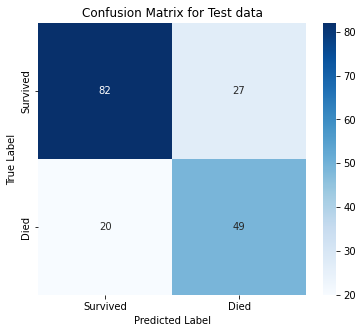

In [6]:
nb.evaluate(DataFlag="Test")

In [7]:
gs=GridSearch()
gs_result=gs.tune_naive_bayes_classifier(nb.model,nb.validation_features,nb.validation_targets)

Best parameters: {'var_smoothing': 1e-05}


In [8]:
bs=BayesianSearch()
bs_result=bs.tune_naive_bayes_classifier(nb.model,nb.validation_features,nb.validation_targets)

print("Grid Search Result : {0}\nBayesian Search Result : {1}".format(gs_result,bs_result))

c:\Users\swapn\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [1.1727373699656917e-09]
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [5.930740376107519e-09]
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [1.8595087633733825e-08]
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [2.1142966955260445e-05]
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [4.

Best Params: OrderedDict([('var_smoothing', 0.01)])
Best Validation Accuracy: 0.7503267973856209
Grid Search Result : {'var_smoothing': 1e-05}
Bayesian Search Result : GaussianNB(var_smoothing=0.01)


In [13]:
nb_optimized=NaiveBayesClassifier(var_smooth=0.01)
nb_optimized.load_train_data()
nb_optimized.load_test_data()
nb_optimized.load_validation_data()

Splitting training data into features and target variables
Splitting testing data into features and target variables
Splitting validation data into features and target variables


In [14]:
nb_optimized.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.797752808988764
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.83      0.84        58
           1       0.70      0.74      0.72        31

    accuracy                           0.80        89
   macro avg       0.78      0.78      0.78        89
weighted avg       0.80      0.80      0.80        89

Confusion Matrix:  [[48 10]
 [ 8 23]]
Roc Score :  0.7847608453837597


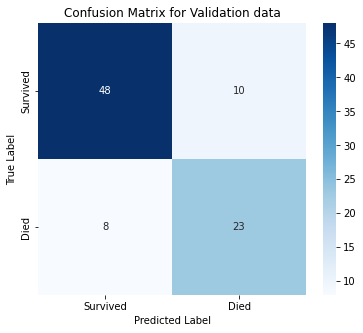

In [15]:
nb_optimized.evaluate("Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.7415730337078652
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.78      0.79       109
           1       0.66      0.68      0.67        69

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

Confusion Matrix:  [[85 24]
 [22 47]]
Roc Score :  0.7304879670256614


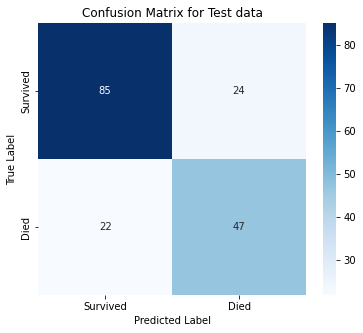

In [16]:
nb_optimized.evaluate("Test")